# Toronto Dwellings Analysis

In this assignment, we will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [1]:
# Initial imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Read the Mapbox API key
load_dotenv()
mapbox_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_api)

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
census = Path("toronto_neighbourhoods_census_data.csv")
census_data = pd.read_csv(census, index_col="year")
census_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, we will calculate the number of dwelling types per year.

In [4]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_number = (census_data
                   .groupby(["year"])[['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house']]
                                     .sum().reset_index()
                  )
dwelling_number

year  single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
0  2001                 300930                       355015                75   
1  2006                 266860                       379400               165   
2  2011                 274940                       429220               100   
3  2016                 269680                       493270                95   

   semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
0                90995      52355   23785                       116900   
1                69430      54690   44095                       162850   
2                72480      60355   44750                       163895   
3                71200      61565   48585                       165575   

   other_house  
0         3040  
1         1335  
2         2165  
3         2845

In [5]:
# Saving the dataframe as a csv file
dwelling_number.to_csv('dewelling_types_per_year.csv')

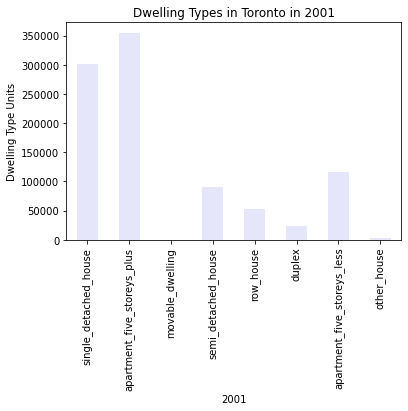

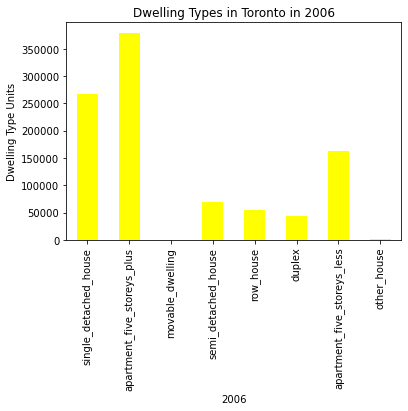

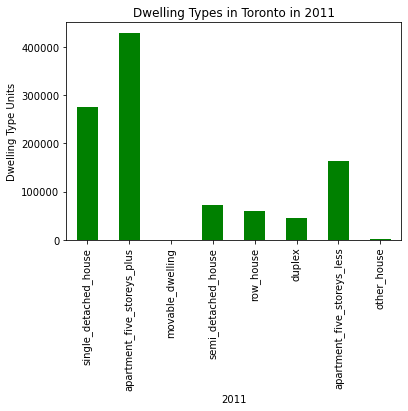

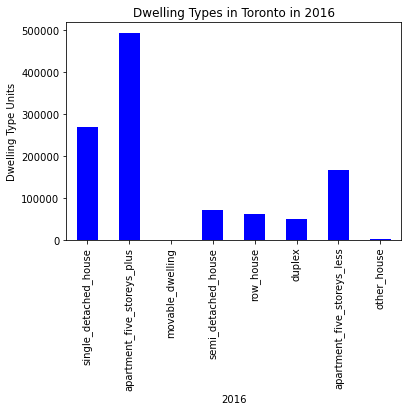

In [6]:
# Bar chart for 2001
dwelling_2001 = dwelling_number[dwelling_number['year'] == 2001]
dwelling_2001.set_index('year', inplace=True)
dwelling_2001 = dwelling_2001.T

plot_2001 = dwelling_2001.plot.bar(title="Dwelling Types in Toronto in 2001", 
                       legend=False, 
                       xlabel="2001",
                       ylabel="Dwelling Type Units",
                       color="lavender"
                                  )

# Bar chart for 2006
dwelling_2006 = dwelling_number[dwelling_number['year'] == 2006]
dwelling_2006.set_index('year', inplace=True)
dwelling_2006 = dwelling_2006.T

plot_2006 = dwelling_2006.plot.bar(title="Dwelling Types in Toronto in 2006", 
                       legend=False, 
                       xlabel="2006",
                       ylabel="Dwelling Type Units",
                       color="yellow",
                       
                      )


# Bar chart for 2011
dwelling_2011 = dwelling_number[dwelling_number['year'] == 2011]
dwelling_2011.set_index('year', inplace=True)
dwelling_2011 = dwelling_2011.T

plot_2011 = dwelling_2011.plot.bar(title="Dwelling Types in Toronto in 2011", 
                       legend=False, 
                       xlabel="2011",
                       ylabel="Dwelling Type Units",
                       color="Green"
                       
                      )

# Bar chart for 2016
dwelling_2016 = dwelling_number[dwelling_number['year'] == 2016]
dwelling_2016.set_index('year', inplace=True)
dwelling_2016 = dwelling_2016.T

plot_2016 = dwelling_2016.plot.bar(title="Dwelling Types in Toronto in 2016", 
                       legend=False, 
                       xlabel="2016",
                       ylabel="Dwelling Type Units",
                       color="blue"
                       
                      )

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, We will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year.

In [7]:
# Calculating the average monthly shelter costs for owned and rented dwellings
avg_dwelling_cost = (census_data
                      .groupby(["year"])[['shelter_costs_owned','shelter_costs_rented']]
                      .mean()
                     )
avg_dwelling_cost

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

In [8]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """

In [9]:
# Creating two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
owned_plot = avg_dwelling_cost.hvplot(title="Average Monthly Shelter Cost for Owned Dwellings in Toronto", 
                       yformatter="%.0f",
                       y="shelter_costs_owned",         
                       xlabel="Year",
                       ylabel="Avg Monthly Shelter Costs",
                       color="green"
                      )

# Line chart for rented dwellings
rented_plot = avg_dwelling_cost.hvplot(title="Average Monthly Shelter Cost for Rented Dwellings in Toronto", 
                       yformatter="%.0f",
                       y="shelter_costs_rented",         
                       xlabel="Year",
                       ylabel="Avg Monthly Shelter Costs",
                       color="red"
                      )
owned_plot + rented_plot

:Layout
   .Curve.I  :Curve   [year]   (shelter_costs_owned)
   .Curve.II :Curve   [year]   (shelter_costs_rented)

## Average House Value per Year

In this section, We want to determine the average house value per year. 

In [10]:
# Calculating the average house value per year
avg_house_value = (census_data
                      .groupby(["year"])[['average_house_value']]
                      .mean()
                     )
avg_house_value

average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

In [11]:
# Plotting the average house value per year as a line chart
avg_house_value_plot = avg_house_value.hvplot(title="Average House Value in Toronto", 
                       legend=False,         
                       xlabel="Year",
                       ylabel="Avg House Value",
                       yformatter="%.0f",
                       color="orange"
                      )
avg_house_value_plot

:Curve   [year]   (average_house_value)

- - - 

## Average House Value by Neighbourhood


In [13]:
# Creating a new DataFrame with the mean house values by neighbourhood per year


nbrh_value_by_year = (census_data.groupby(['year', 'neighbourhood'])[['average_house_value']]
                      .mean().reset_index()
                     )
nbrh_value_by_year.head()

year                 neighbourhood  average_house_value
0  2001               Agincourt North             200388.0
1  2001  Agincourt South-Malvern West             203047.0
2  2001                     Alderwood             259998.0
3  2001                         Annex             453850.0
4  2001             Banbury-Don Mills             371864.0

In [14]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [14]:
# Using hvplot to create an interactive line chart of the average house value per neighbourhood
avg_value_plot = nbrh_value_by_year.hvplot(
                             x="year",
                             groupby='neighbourhood',
                        legend=False,         
                        xlabel="Year",
                        ylabel="Avg House Value",
                    
                      )
avg_value_plot


:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year


In [16]:
# Fetching the data of all dwelling types per year
nbrh_dwelling = (census_data
                          .groupby(["year", "neighbourhood"])[['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house',]]
                      .sum().reset_index()
                     )
nbrh_dwelling.head()

year                 neighbourhood  single_detached_house  \
0  2001               Agincourt North                   3715   
1  2001  Agincourt South-Malvern West                   3250   
2  2001                     Alderwood                   3175   
3  2001                         Annex                   1060   
4  2001             Banbury-Don Mills                   3615   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                         1480                 0                 1055   
1                         1835                 0                  545   
2                          315                 0                  470   
3                         6090                 5                 1980   
4                         4465                 0                  240   

   row_house  duplex  apartment_five_storeys_less  other_house  
0       1295     195                          185            5  
1        455     105                          425            0  
2         50     185                          370            0  
3        605     275                         3710          165  
4        380      15                         1360            0

In [16]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

In [17]:
# Using hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood

nbrh_dwelling_types = nbrh_dwelling.hvplot(
                             kind='bar',
                             height=500,   
                             x="year",
                             rot=90,
                             groupby='neighbourhood',        
                       xlabel="Year",
                       ylabel="Avg House Value",
                      )
nbrh_dwelling_types

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In [19]:
# Getting the data from the top 10 expensive neighbourhoods

top_10 = nbrh_value_by_year.sort_values(ascending=False, by='average_house_value').drop(columns=['year'])
top_10 = top_10.reset_index().drop(columns=['index'])
top_10.head(10)

neighbourhood  average_house_value
0  Bridle Path-Sunnybrook-York Mills            2124653.0
1  Bridle Path-Sunnybrook-York Mills            1697067.0
2                  Forest Hill South            1664653.0
3                Lawrence Park South            1522732.0
4                Rosedale-Moore Park            1522193.0
5               St.Andrew-Windfields            1390616.0
6                          Casa Loma            1365503.0
7  Bridle Path-Sunnybrook-York Mills            1356757.0
8                  Forest Hill South            1329642.0
9               Bedford Park-Nortown            1295007.0

In [18]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

:Bars   [neighbourhood]   (average_house_value)

In [20]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_plot = top_10.head(10).hvplot.bar(x='neighbourhood',
                                         rot=90,
                                         title='Top 10 Expensive Neighbourhood in Toronto',
                                         height=500)

top_10_plot

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map



### Load Location Data

In [21]:
# Loading neighbourhoods coordinates data
coordinates = Path("toronto_neighbourhoods_coordinates.csv")
nbrh_location = pd.read_csv(coordinates)
nbrh_location.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

In [22]:
# Calculating the mean values for each neighborhood
mean_value_nbrh =  (census_data.groupby(["neighbourhood"])[['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house','average_house_value','shelter_costs_owned','shelter_costs_rented']]
                      .mean().reset_index()
                     )
mean_value_nbrh.head()

neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

In [23]:
# Merging the average values with the neighbourhood locations 
combined_df = pd.concat([nbrh_location, 
                             mean_value_nbrh.loc[:,mean_value_nbrh.columns != 'neighbourhood']], 
                        axis=1)
combined_df.head()

neighbourhood        lat        lon  single_detached_house  \
0               Agincourt North  43.805441 -79.266712                3435.00   
1  Agincourt South-Malvern West  43.788658 -79.265612                2897.50   
2                     Alderwood  43.604937 -79.541611                2903.75   
3                         Annex  43.671585 -79.404001                 751.25   
4             Banbury-Don Mills  43.737657 -79.349718                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

### Mapbox Visualization


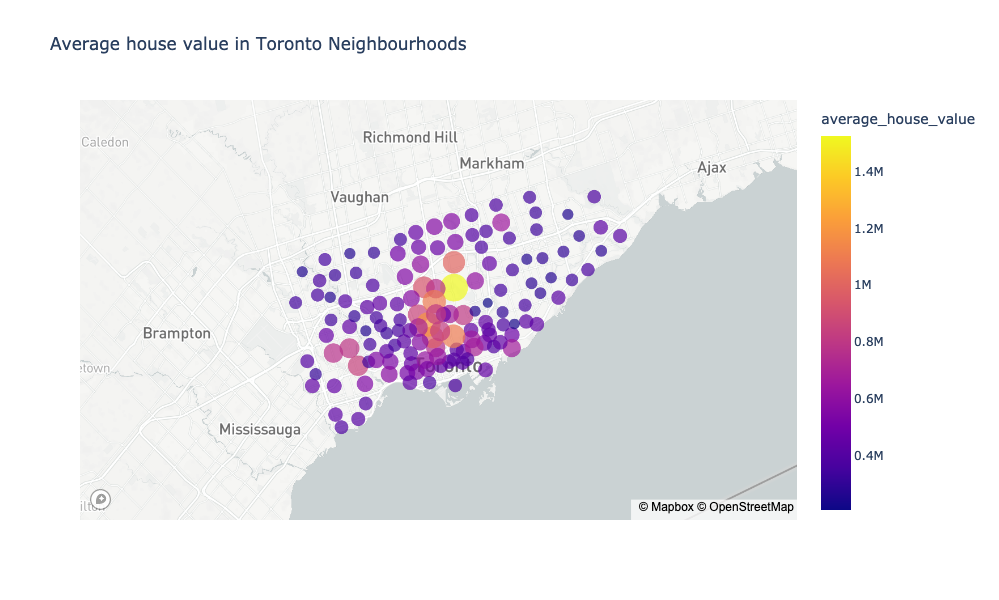

In [24]:
# Creating a scatter mapbox to analyze neighbourhood infomation
map_plot = px.scatter_mapbox(
    
    combined_df,
    lat="lat",
    lon = 'lon',
    color = 'average_house_value',
    size = 'average_house_value',
    hover_name = 'neighbourhood',
    title='Average house value in Toronto Neighbourhoods',
    height = 600,
    zoom = 9
    
)

map_plot.show()

- - -

## Cost Analysis - Optional Challenge

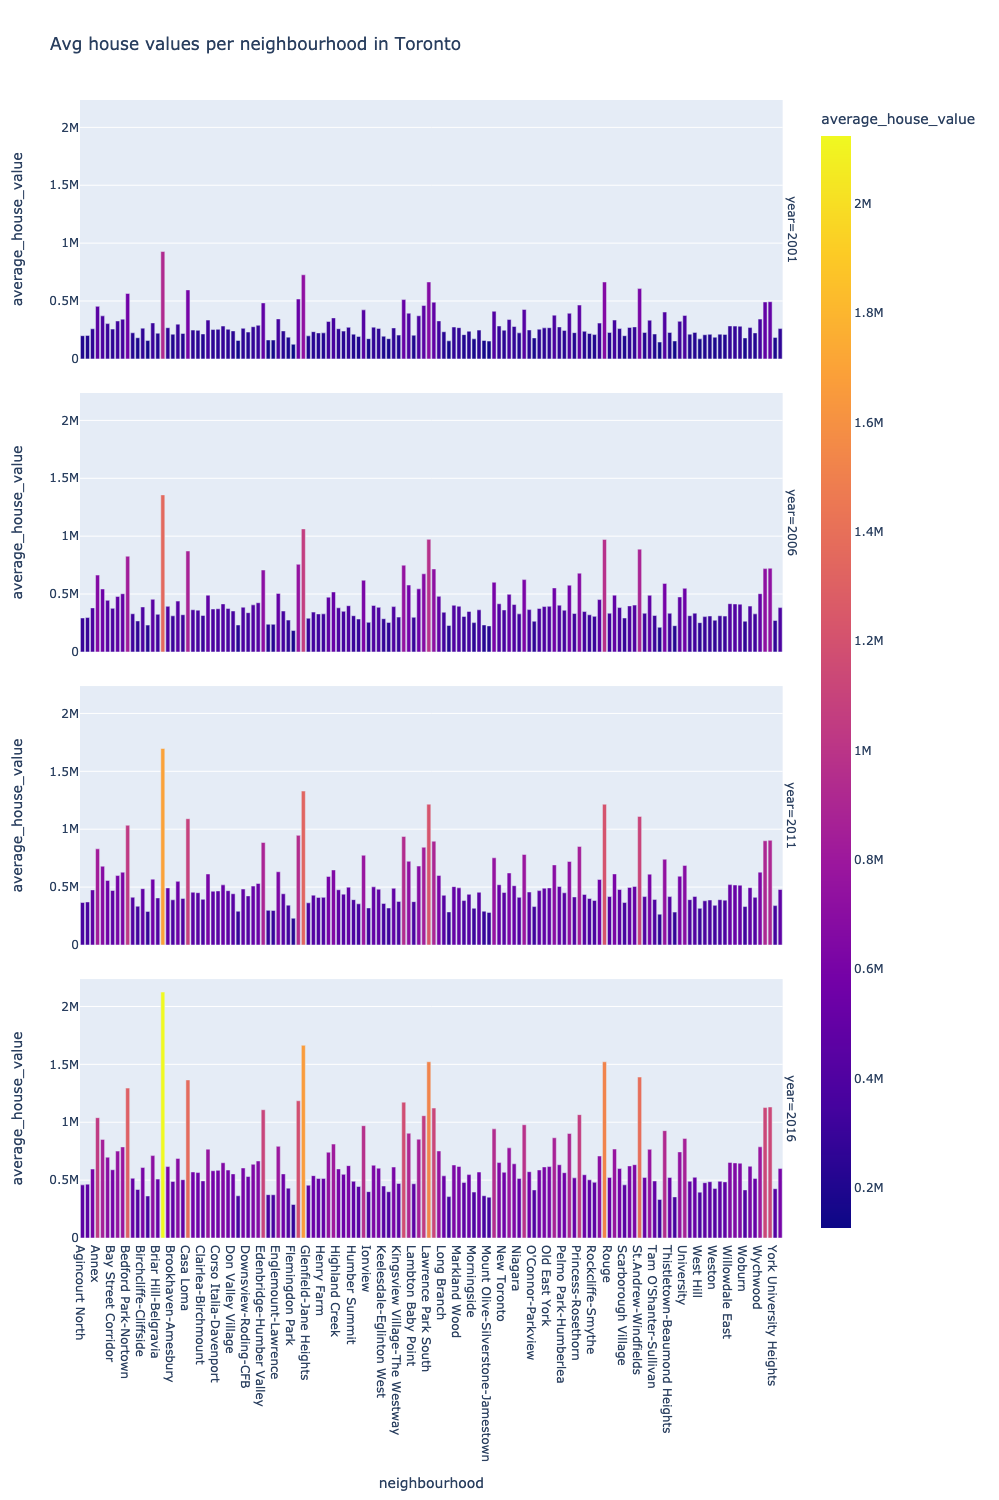

In [25]:
# Bar Chart Row Facet
facet_row = px.bar(nbrh_value_by_year, color="average_house_value",
                   title='Avg house values per neighbourhood in Toronto',
             y="average_house_value", x="neighbourhood", facet_row="year", height=1500)
facet_row.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [26]:
# Fetching the data from all expensive neighbourhoods per year.
expensive_neighbourhoods_per_year = nbrh_value_by_year.sort_values(ascending=False, by='average_house_value')
expensive_neighbourhoods_per_year.head()

year                      neighbourhood  average_house_value
436  2016  Bridle Path-Sunnybrook-York Mills            2124653.0
296  2011  Bridle Path-Sunnybrook-York Mills            1697067.0
464  2016                  Forest Hill South            1664653.0
489  2016                Lawrence Park South            1522732.0
524  2016                Rosedale-Moore Park            1522193.0

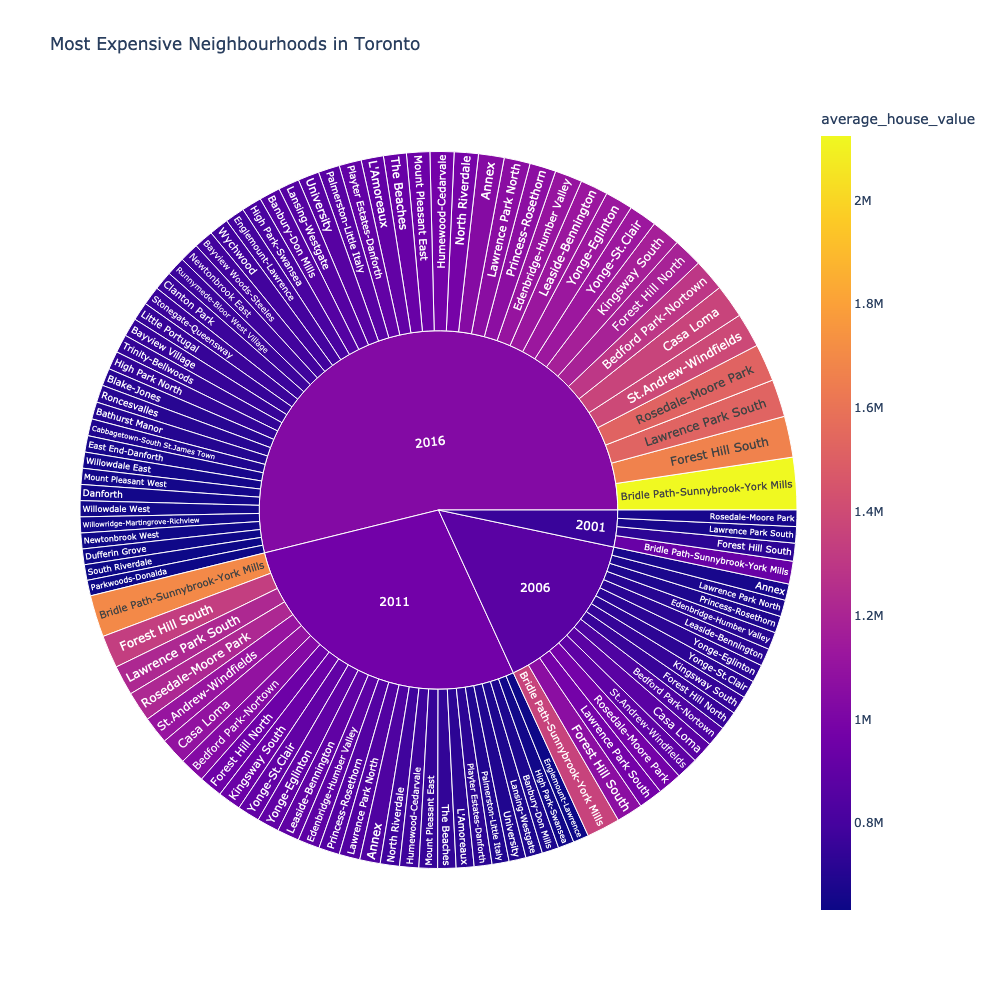

In [27]:
# Creating the sunburst chart of top 100 expensive neighbourhoods in toronto
sunburst = px.sunburst(expensive_neighbourhoods_per_year.head(100), path=['year', 'neighbourhood'], values='average_house_value', 
                          color='average_house_value', 
                          title='Most Expensive Neighbourhoods in Toronto', height=1000)
sunburst.show()